In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shenba/time-series-datasets")

print("Path to dataset files:", path)

100%|██████████| 19.2k/19.2k [00:00<00:00, 9.81MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shenba/time-series-datasets/versions/1


In [2]:
import os
import pandas as pd
# Define the file path
file_path = os.path.join("/root/.cache/kagglehub/datasets/shenba/time-series-datasets/versions/1",
                         "sales-of-shampoo-over-a-three-ye.csv")

data = pd.read_csv(file_path)

# Identify missing values
missing_summary = data.isnull().sum()

# Print the missing values summary
print(missing_summary)


Month                                        0
Sales of shampoo over a three year period    0
dtype: int64


   Month  Sales
0  1-Jan  266.0
1  1-Feb  145.9
2  1-Mar  183.1
3  1-Apr  119.3
4  1-May  180.3


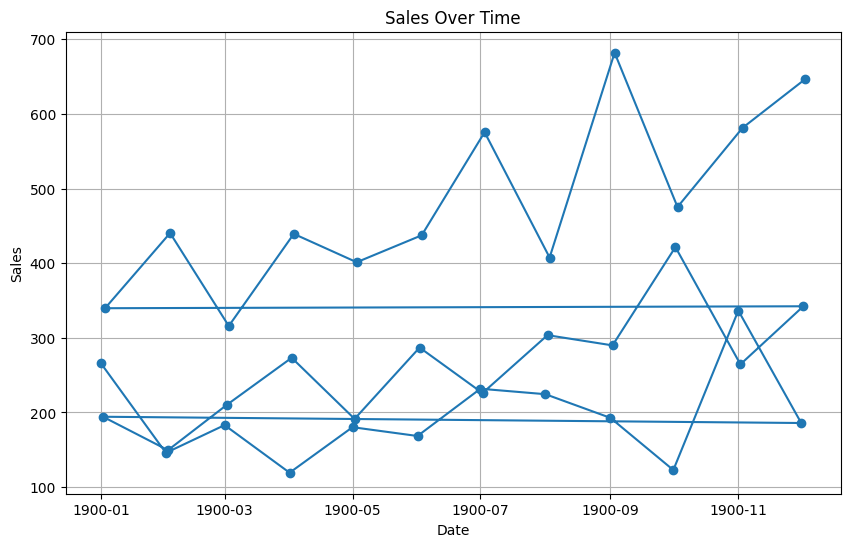

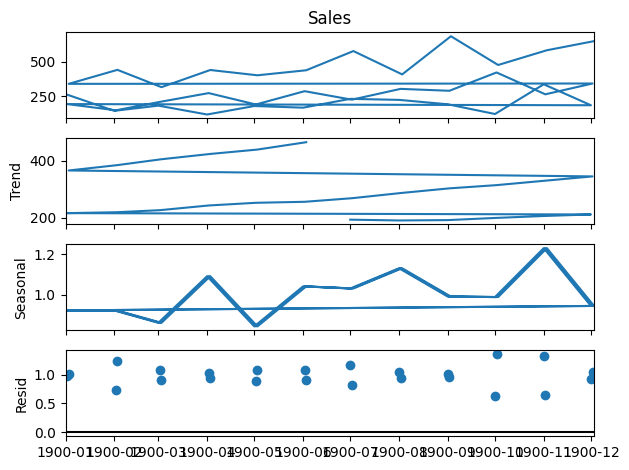

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

print(data.head())

data.columns = ['Month', 'Sales']
data['Month'] = pd.to_datetime(data['Month'], format='%d-%b', errors='coerce').fillna(pd.to_datetime('2000-' + data['Month'], format='%Y-%d-%b'))
data.set_index('Month', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

result = seasonal_decompose(data['Sales'], model='multiplicative', period=12)

result.plot()
plt.show()

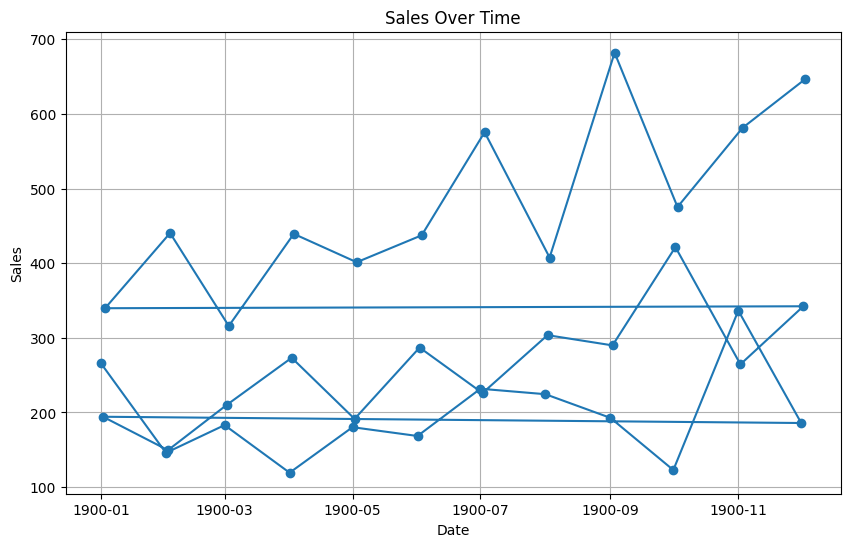

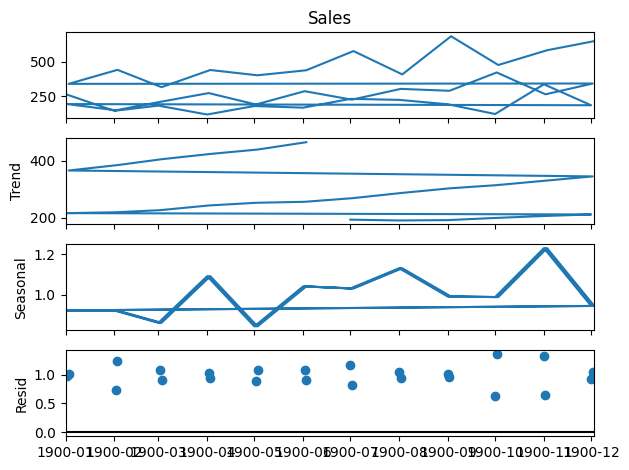

Trend:
 Month
1900-01-01           NaN
1900-02-01           NaN
1900-03-01           NaN
1900-04-01           NaN
1900-05-01           NaN
1900-06-01           NaN
1900-07-01    193.470833
1900-08-01    190.633333
1900-09-01    191.908333
1900-10-01    199.450000
1900-11-01    206.329167
1900-12-01    211.729167
1900-01-02    216.425000
1900-02-02    219.479167
1900-03-02    226.820833
1900-04-02    243.312500
1900-05-02    252.758333
1900-06-02    256.275000
1900-07-02    268.850000
1900-08-02    287.029167
1900-09-02    303.558333
1900-10-02    314.883333
1900-11-02    330.545833
1900-12-02    345.558333
1900-01-03    366.387500
1900-02-03    385.283333
1900-03-03    405.954167
1900-04-03    424.529167
1900-05-03    439.966667
1900-06-03    465.858333
1900-07-03           NaN
1900-08-03           NaN
1900-09-03           NaN
1900-10-03           NaN
1900-11-03           NaN
1900-12-03           NaN
Name: trend, dtype: float64
Seasonal:
 Month
1900-01-01    0.922913
1900-02-01    0.92

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], marker='o', linestyle='-')  # Access the 'Sales' column directly
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Decompose the time series using Multiplicative Model
result = seasonal_decompose(data['Sales'], model='multiplicative', period=12)  # Using the 'Sales' column

# Plot decomposition
result.plot()
plt.tight_layout()
plt.show()

# Access decomposition components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Print component summaries
print('Trend:\n', trend)
print('Seasonal:\n', seasonal)
print('Residual Summary:\n', residual.describe())

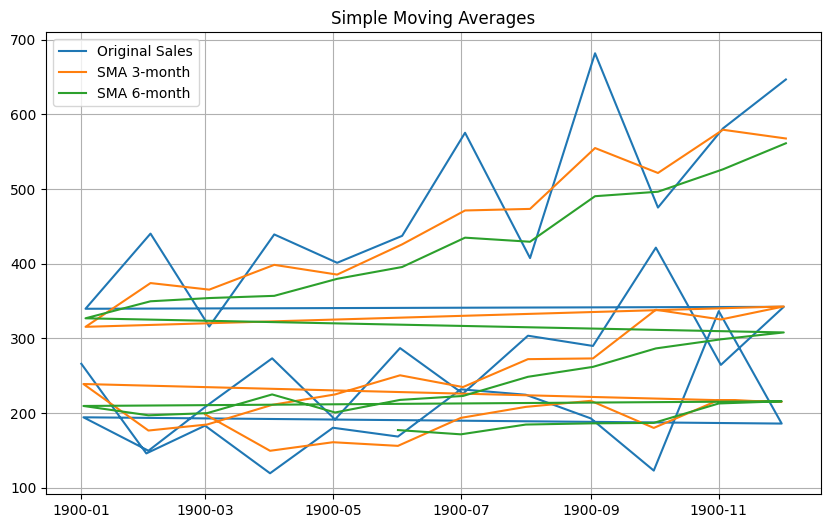

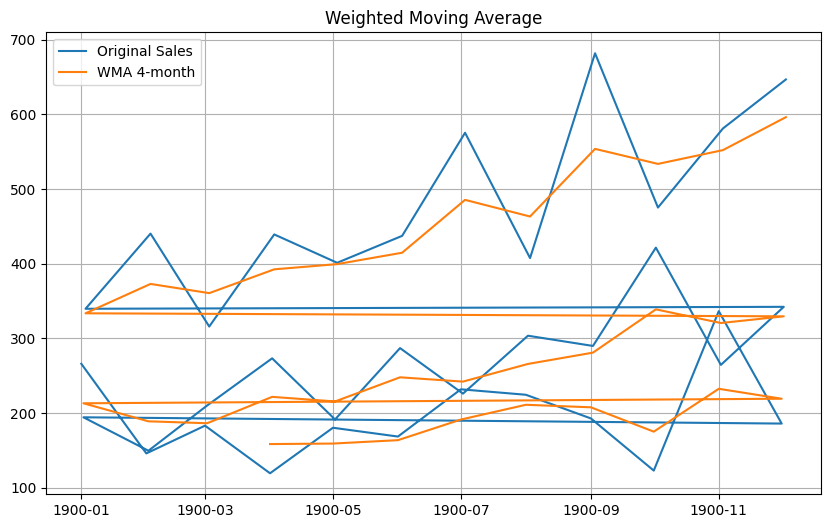

In [7]:


# Apply Simple Moving Average (SMA)
data['SMA_3'] = data['Sales'].rolling(window=3).mean()
data['SMA_6'] = data['Sales'].rolling(window=6).mean()

# Plot SMA
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Original Sales')
plt.plot(data['SMA_3'], label='SMA 3-month')
plt.plot(data['SMA_6'], label='SMA 6-month')
plt.title('Simple Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

# Apply Weighted Moving Average (WMA)
def weighted_moving_average(values, weights):
    return sum(values * weights) / sum(weights)

weights = [0.1, 0.2, 0.3, 0.4]
wma = []
for i in range(len(data['Sales']) - len(weights) + 1):
    wma.append(weighted_moving_average(data['Sales'].iloc[i:i+4], weights))

# Add WMA to the data
data['WMA_4'] = [None] * (len(data) - len(wma)) + wma

# Plot WMA
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Original Sales')
plt.plot(data['WMA_4'], label='WMA 4-month')
plt.title('Weighted Moving Average')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-9-cd589064e78d>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1900-01', periods=len(data), freq='M')


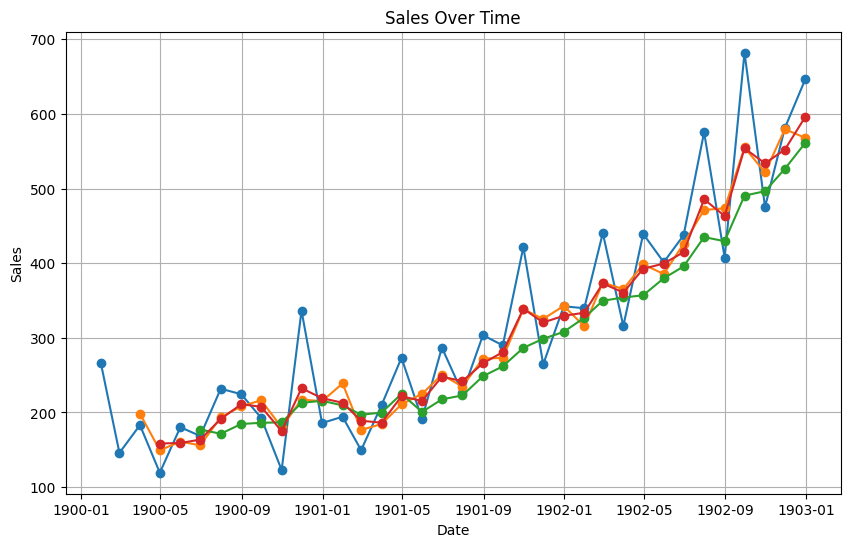

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-9-cd589064e78d>:24: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt_model = ExponentialSmoothing(data['Sales'], trend='add', seasonal=None).fit(smoothing_level=0.2, smoothing_slope=0.2, optimized=True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information 

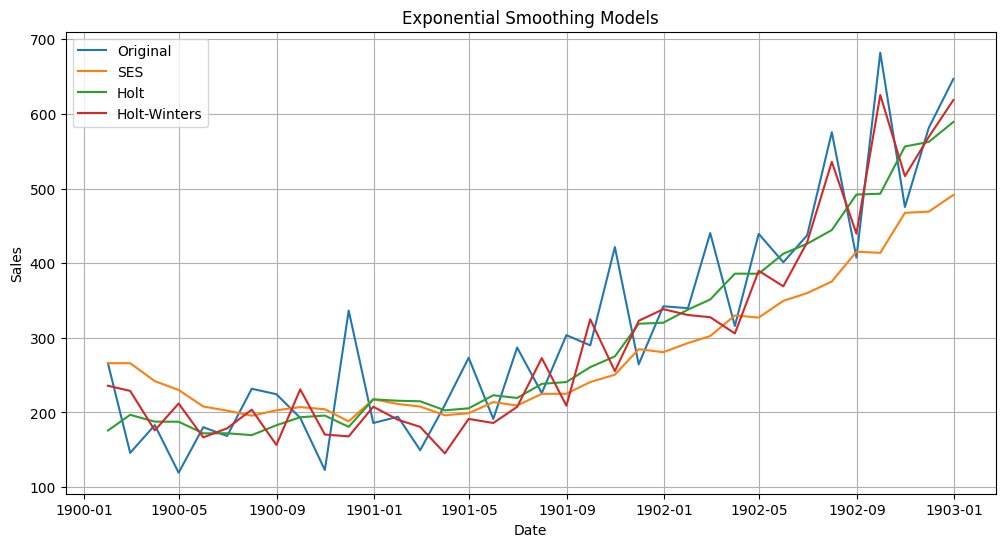

SES MSE: 8698.861149558394
Holt MSE: 5073.585728489032
Holt-Winters MSE: 3924.1484485476217


In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing


# Generate a proper datetime index by assuming data starts from January 1, 1900
data['Month'] = pd.date_range(start='1900-01', periods=len(data), freq='M')

# Set 'Month' as index
data.set_index('Month', inplace=True)

# Plot the raw data
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Single Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(data['Sales']).fit(smoothing_level=0.2, optimized=True)
data['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (Holt's Linear Trend)
holt_model = ExponentialSmoothing(data['Sales'], trend='add', seasonal=None).fit(smoothing_level=0.2, smoothing_slope=0.2, optimized=True)
data['Holt'] = holt_model.fittedvalues

# Triple Exponential Smoothing (Holt-Winters)
hw_model = ExponentialSmoothing(data['Sales'], trend='add', seasonal='mul', seasonal_periods=12).fit(optimized=True)
data['Holt_Winters'] = hw_model.fittedvalues

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Original')
plt.plot(data['SES'], label='SES')
plt.plot(data['Holt'], label='Holt')
plt.plot(data['Holt_Winters'], label='Holt-Winters')
plt.title('Exponential Smoothing Models')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Models
from sklearn.metrics import mean_squared_error

ses_mse = mean_squared_error(data['Sales'], data['SES'])
holt_mse = mean_squared_error(data['Sales'], data['Holt'])
hw_mse = mean_squared_error(data['Sales'], data['Holt_Winters'])

print(f'SES MSE: {ses_mse}')
print(f'Holt MSE: {holt_mse}')
print(f'Holt-Winters MSE: {hw_mse}')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.4 MB/s eta 0:00:00
ADF Statistic: 3.060142083641181
p-value: 1.0
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIM

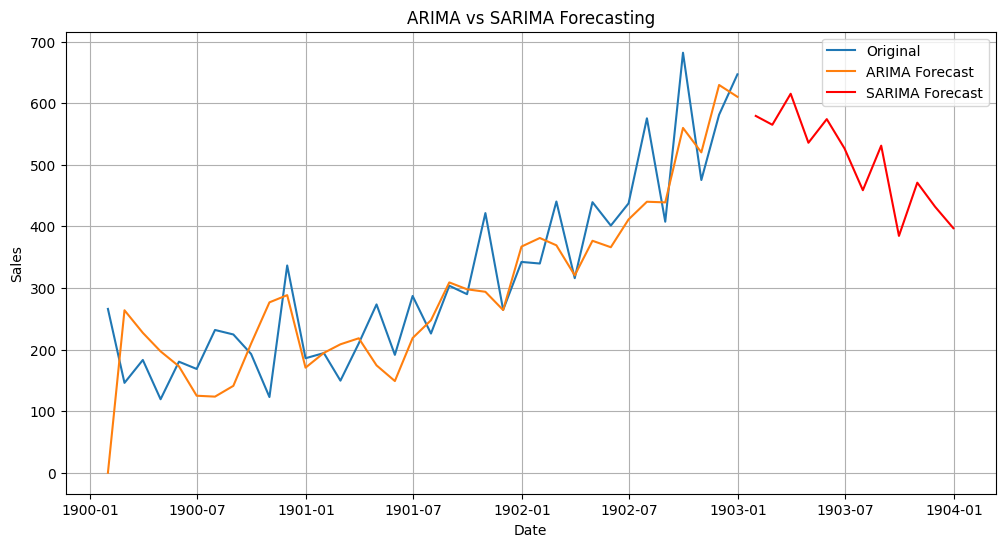

ARIMA MSE: 6378.901773466568


In [11]:
!pip install pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Generate a proper datetime index by assuming data starts from January 1, 1900
data['Month'] = pd.date_range(start='1900-01', periods=len(data), freq='M')

# Set 'Month' as index
data.set_index('Month', inplace=True)

# Check stationarity
result = adfuller(data['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Fit ARIMA Model
auto_arima_model = auto_arima(data['Sales'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(auto_arima_model.summary())

p, d, q = auto_arima_model.order
arima_model = ARIMA(data['Sales'], order=(p, d, q)).fit()

# Fit SARIMA Model
auto_sarima_model = auto_arima(data['Sales'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(auto_sarima_model.summary())

P, D, Q, s = auto_sarima_model.seasonal_order
sarima_model = SARIMAX(data['Sales'], order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()

# Forecasting
data['ARIMA_Forecast'] = arima_model.fittedvalues
sarima_forecast = sarima_model.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1], periods=13, freq='M')[1:]
forecast_values = sarima_forecast.predicted_mean

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Original')
plt.plot(data['ARIMA_Forecast'], label='ARIMA Forecast')
plt.plot(forecast_index, forecast_values, label='SARIMA Forecast', color='red')
plt.title('ARIMA vs SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Models
arima_mse = mean_squared_error(data['Sales'], data['ARIMA_Forecast'])
print(f'ARIMA MSE: {arima_mse}')


ADF Statistic: 3.060142083641181
p-value: 1.0
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[

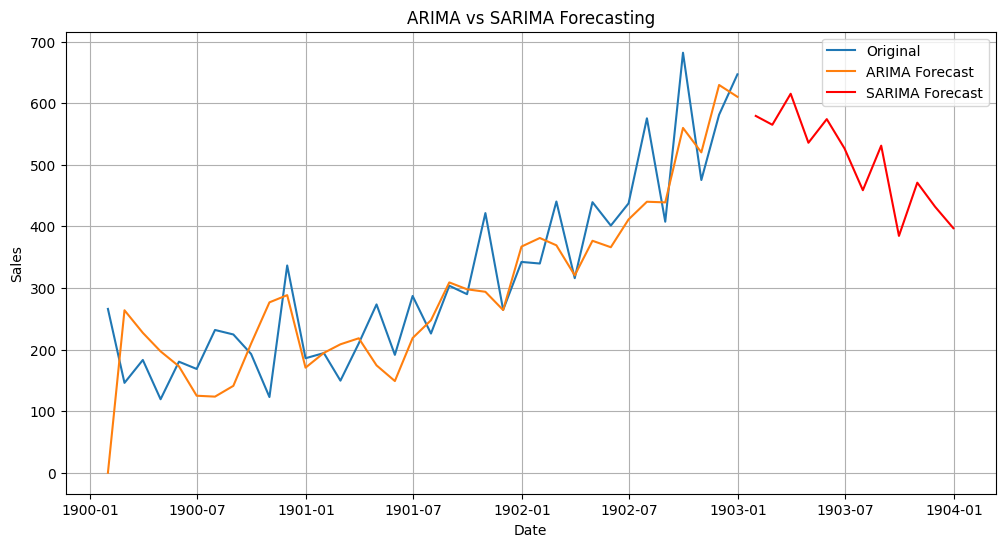

ARIMA MSE: 6378.901773466568, RMSE: 79.8680272290894, MAE: 58.538234897434386
SARIMA MSE: 34324.638660916295, RMSE: 185.26909796540895, MAE: 163.6196143004512
ARIMA performs better based on RMSE and MAE, suggesting no strong seasonal component.


In [13]:
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate a proper datetime index by assuming data starts from January 1, 1900
data['Month'] = pd.date_range(start='1900-01', periods=len(data), freq='M')

# Set 'Month' as index
data.set_index('Month', inplace=True)

# Check stationarity
result = adfuller(data['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Fit ARIMA Model
auto_arima_model = auto_arima(data['Sales'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(auto_arima_model.summary())

p, d, q = auto_arima_model.order
arima_model = ARIMA(data['Sales'], order=(p, d, q)).fit()

# Fit SARIMA Model
auto_sarima_model = auto_arima(data['Sales'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(auto_sarima_model.summary())

P, D, Q, s = auto_sarima_model.seasonal_order
sarima_model = SARIMAX(data['Sales'], order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()

# Forecasting
data['ARIMA_Forecast'] = arima_model.fittedvalues
sarima_forecast = sarima_model.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1], periods=13, freq='M')[1:]
forecast_values = sarima_forecast.predicted_mean

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Original')
plt.plot(data['ARIMA_Forecast'], label='ARIMA Forecast')
plt.plot(forecast_index, forecast_values, label='SARIMA Forecast', color='red')
plt.title('ARIMA vs SARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Models
arima_mse = mean_squared_error(data['Sales'], data['ARIMA_Forecast'])
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(data['Sales'], data['ARIMA_Forecast'])

sarima_mse = mean_squared_error(data['Sales'][-12:], forecast_values)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(data['Sales'][-12:], forecast_values)

print(f'ARIMA MSE: {arima_mse}, RMSE: {arima_rmse}, MAE: {arima_mae}')
print(f'SARIMA MSE: {sarima_mse}, RMSE: {sarima_rmse}, MAE: {sarima_mae}')

# Summary of Results
if sarima_rmse < arima_rmse:
    print("SARIMA performs better based on RMSE and MAE, indicating it captures seasonality effectively.")
else:
    print("ARIMA performs better based on RMSE and MAE, suggesting no strong seasonal component.")
